## SVM

## Classification

In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from time import time
from sklearn.model_selection import StratifiedShuffleSplit#用于支持带交叉验证的网格搜索
from sklearn.model_selection import GridSearchCV#带交叉验证的网格搜索
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0
                  )
data.head()
data["BackDistance"]=(data["BackDistance"]>= 15).astype("int")
data["BackDistance"]
type(data)
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
X.shape, y.shape
(y == 0).sum()
X.head()
#X.iloc[:,X.columns == 'V'].values
# y.values
#X

,V,T,HRR
Id,,,
1,2.7486,16.8125,5578.8956
2,1.1585,12.8702,9768.1077
3,1.0696,23.5542,11833.7440
4,2.3904,14.4162,7735.6189
5,0.5358,14.7729,11367.2940


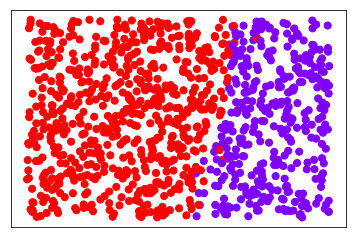

In [3]:
plt.scatter(X.iloc[:,X.columns == 'V'].values,X.iloc[:,X.columns == 'HRR'].values,c=y.values,s=50,cmap="rainbow")#rainbow彩虹色
plt.xticks([])
plt.yticks([])
plt.show()

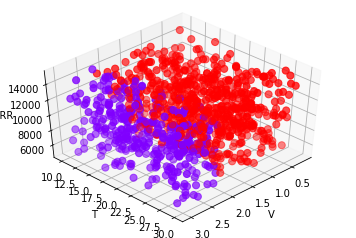

In [4]:
from mpl_toolkits import mplot3d
def plot_3D(elev=45,azim=45,X=X,y=y):
    ax = plt.subplot(projection="3d")
   # ax.scatter3D(X.iloc[:,X.columns == 'V'].values,X.iloc[:,X.columns == 'T'].values,X.iloc[:,X.columns == 'HRR'].values,c=y.values,s=50,cmap="rainbow")#rainbow彩虹色
    ax.scatter3D(X.iloc[:,X.columns == 'V'].values,X.iloc[:,X.columns == 'T'].values
                 ,X.iloc[:,X.columns == 'HRR'].values,c=y.values.ravel(),s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("V")
    ax.set_ylabel("T")
    ax.set_zlabel("HRR")
    plt.show()
plot_3D()

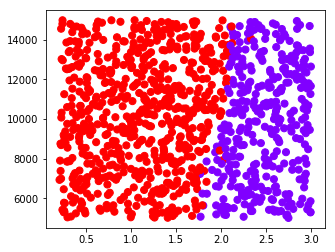

In [5]:
datasets = [
    (X.values,y.values.ravel())
    ]
Kernel = ["linear","poly","rbf","sigmoid"]
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,2],c=Y,s=50,cmap="rainbow")

In [6]:
nrows=len(datasets)
ncols=len(Kernel) + 1
ncols

5

### Scaled

In [3]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X)
scalar.mean_
scalar.var_
XXX = scalar.transform(X)
#y = y.values.ravel()
XXXX = pd.DataFrame(XXX, columns=['V','T','HRR'])
# X = XXXX.values
# #X,y = X.values,y.values.ravel()
XXXX.shape

(1000, 3)

In [4]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
Kernel = ["linear","poly","rbf","sigmoid"]

for kernel in Kernel:
    clf = SVC(kernel = kernel).fit(XXX,y)
    print



D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=40)
 
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(time()-time0)

D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy under kernel linear is 0.923333
6.785855770111084


D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy under kernel poly is 0.990000
9.122639179229736
The accuracy under kernel rbf is 0.616667
0.09973287582397461
The accuracy under kernel sigmoid is 0.616667
0.009974241256713867


D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score = []
gamma_range = np.logspace(-10, 1, 50) 
for i in gamma_range:
    clf = SVC(kernel="poly",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
#clf = SVC(kernel="poly",cache_size=5000).fit(Xtrain,Ytrain)
clf= SVC(kernel = "poly"
             , gamma="auto"
             , degree = 1
             , cache_size=5000
            ).fit(Xtrain,Ytrain)
score_te = cross_val_score(clf,X,y,cv=5).mean()
print(
    clf.score(Xtest,Ytest)
 #   ,score_te
)

D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.99


In [5]:
from sklearn.model_selection import cross_val_score
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=40)
import warnings
warnings.filterwarnings("ignore")
clf= SVC(kernel = "poly"
             , gamma="auto"
             , degree = 1.1
             , cache_size=5000
            ).fit(Xtrain,Ytrain)
score_te = cross_val_score(clf,X,y,cv=5).mean()
print(
    'TEST：',clf.score(Xtest,Ytest),
    'VERTIFY：',score_te
)

测试集： 0.99 验证集： 0.9710144253606341


In [5]:
import warnings
from sklearn.metrics import confusion_matrix
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=40)
warnings.filterwarnings("ignore")
clf= SVC(kernel = "poly"
             , gamma="auto"
             , degree = 1.1
             , cache_size=5000
            ).fit(Xtrain,Ytrain)
y_predict = clf.predict(Xtest)
target_names = ['class 0', 'class 1']
acc = accuracy_score(Ytest, y_predict)
print(classification_report(Ytest, y_predict, target_names=target_names, digits=4))
print('ACC:',acc)
print(confusion_matrix(Ytest, y_predict))

              precision    recall  f1-score   support

     class 0     1.0000    0.9333    0.9655       105
     class 1     0.9653    1.0000    0.9824       195

    accuracy                         0.9767       300
   macro avg     0.9827    0.9667    0.9739       300
weighted avg     0.9775    0.9767    0.9765       300

ACC: 0.9766666666666667
[[ 98   7]
 [  0 195]]


SVM
[[ 98   7]
 [  0 195]]


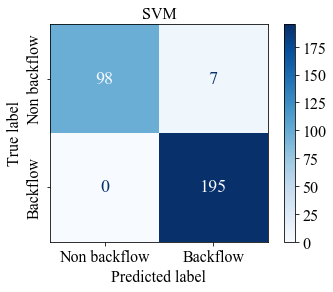

In [8]:
# Plot non-normalized confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
class_names = ['Non backflow','Backflow']
titles_options = [("SVM", None)
                 #,("Normalized confusion matrix", 'true')
                 ]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, Xtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 values_format='.0f',
                                 normalize=None)
    disp.ax_.set_title(title,fontsize = 16,family = 'Times New Roman')

    print(title)
    print(disp.confusion_matrix)
    plt.savefig('SVM.svg', bbox_inches='tight')
plt.show()
#plt.savefig('pic.svg', bbox_inches='tight')

In [10]:
#############################
# pppppppp
#  lllllllll
#     ooooooooo
#       tttttttttt
##############################
ytest = Ytest.values.reshape(-1,1).ravel()
yy=y_predict.reshape(-1,1).ravel()
sample = np.arange(300).ravel()
sm = (sample).reshape(-1,1).ravel()
A=[sm,yy,ytest]
B=np.zeros((3, 293))#right
C=np.zeros((3, 7))#falut
np.array(A).shape
m,n = 0,0
for i in range(300):
    if A[1][i] == A[2][i]:
        B[0][m] = A[0][i]
        B[1][m] = A[1][i]
        B[2][m] = A[2][i]
        m = m+1
    else:
        C[0][n] = A[0][i]
        C[1][n] = A[1][i]
        C[2][n] = A[2][i]
        n = n+1
np.savetxt('SVM_right.txt',B,fmt = '%d')
np.savetxt('SVM_fault.txt',C,fmt = '%d')

0.9933333333333333 3.0204081632653064


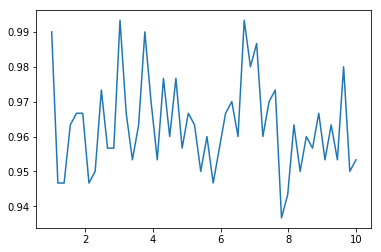

In [7]:
score = []
C_range = np.linspace(1,10,50)
for i in C_range:
    clf = SVC(kernel = "poly"
             , gamma="auto"
             , C=i
             , degree = 1
             , cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

### Regresion(!!NOTE:Do not fault that using the calssifer dataset)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import svm
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0 
                  )
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
[Xtrain, Xtest, Ytrain, Ytest]
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
a = pd.concat([Xtest,Ytest],axis = 1)
a = a.sort_values('V').reset_index(drop = True)
Xtest = a.iloc[:,data.columns != "BackDistance"]
Ytest = a.iloc[:,data.columns == "BackDistance"]
Xtrain.head()


,V,T,HRR
0,1.5224,14.4373,10558.3120
1,2.5960,29.6608,5320.9802
2,0.2037,17.1596,6925.7839
3,2.4917,18.5998,14047.8020
4,1.1585,12.8702,9768.1077


In [27]:
from sklearn.preprocessing import StandardScaler
scalarX = StandardScaler()
scalarX.fit(Xtrain)
scalarX.mean_
scalarX.var_
Xtrain = scalarX.transform(Xtrain)
Xtest = scalarX.transform(Xtest)
# #y = y.values.ravel()
# XXXX = pd.DataFrame(XXX, columns=['V','T','HRR'])
# # X = XXXX.values
# # #X,y = X.values,y.values.ravel()
# XXXX.shape
scalarY = StandardScaler()
scalarY.fit(Ytrain)
scalarY.mean_
scalarY.var_
Ytrain = scalarY.transform(Ytrain)
Ytest = scalarY.transform(Ytest)

In [28]:
XXXX = pd.DataFrame(Xtrain, columns=['V','T','HRR'])
XXXX.head()

,V,T,HRR
0,-0.054885,-0.987012,0.169771
1,1.282534,1.713378,-1.644172
2,-1.697633,-0.504123,-1.088351
3,1.152604,-0.248655,1.378351
4,-0.508207,-1.264989,-0.103915


In [29]:
Kernel = ['linear','poly','rbf','sigmoid']
for kernel in Kernel:
    clf = svm.SVR(
    C=1
    , cache_size=2000
    , coef0=0.0, degree=1
 #   , epsilon=0.1
   # , gamma='scale'
    , kernel= kernel
  #  , max_iter=-1
 #   , shrinking=True
  #  , tol=0.001
   # , verbose=False
             ).fit(Xtrain,Ytrain)
    s = clf.score(Xtest,Ytest)
    print(kernel,':',s)

linear : 0.9742699888349104
poly : 0.9742524923803204
rbf : 0.9824583129900473
sigmoid : -230.86588145371744


0.9827672265114117 42.0


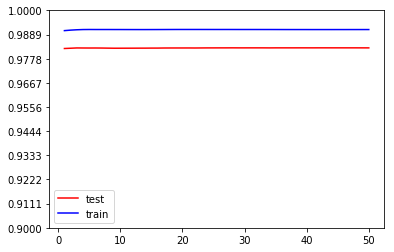

In [31]:
import warnings
warnings.filterwarnings("ignore")
C_range = np.linspace(1,50,50)
score_te = []
score_tr = []
for i in C_range:
    clf = svm.SVR(
    C=i
    , cache_size=2000
    , coef0=0.0, degree=1
#    , epsilon=0.1
#    , gamma='auto_deprecated'
    , kernel='rbf'
#    , max_iter=-1
#   , shrinking=True
#    , tol=0.001
#    , verbose=False
             ).fit(Xtrain,Ytrain)
    score_te.append(clf.score(Xtest,Ytest))
    score_tr.append(clf.score(Xtrain,Ytrain))
    
print(max(score_te), C_range[score_te.index(max(score_te))])
plt.plot(C_range,score_te,color="red",label="test")
plt.plot(C_range,score_tr,color="blue",label="train")
plt.yticks(np.linspace(0.9,1,10))
plt.legend()
plt.show()

### modify the plot

In [18]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0 
                  )
data.head()
data["BackDistance"]
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
X.shape, y.shape
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
Xtrain.head()
[Xtrain, Xtest, Ytrain, Ytest]
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
a = pd.concat([Xtest,Ytest],axis = 1)
a = a.sort_values('V').reset_index(drop = True)
Xtest = a.iloc[:,data.columns != "BackDistance"]
Ytest = a.iloc[:,data.columns == "BackDistance"]
Xtrain.head()

,V,T,HRR
0,0.2747,21.6283,12548.3340
1,0.8811,20.5675,8034.5177
2,0.2334,16.0990,8726.6787
3,1.4344,21.3550,8098.8389
4,1.1484,25.4910,11742.4370


In [25]:
from sklearn.preprocessing import StandardScaler
scalarX = StandardScaler()
scalarX.fit(Xtrain)
scalarX.mean_
scalarX.var_
Xtrain = scalarX.transform(Xtrain)
Xtest = scalarX.transform(Xtest)
# #y = y.values.ravel()
# XXXX = pd.DataFrame(XXX, columns=['V','T','HRR'])
# # X = XXXX.values
# # #X,y = X.values,y.values.ravel()
# XXXX.shape
scalarY = StandardScaler()
scalarY.fit(Ytrain)
scalarY.mean_
scalarY.var_
Ytrain = scalarY.transform(Ytrain)
Ytest = scalarY.transform(Ytest)
print(pd.DataFrame(Xtrain))

            0         1         2
0   -1.637833  0.284438  0.897851
1   -0.877541  0.094786 -0.669101
2   -1.689614 -0.704105 -0.428820
3   -0.183825  0.235577 -0.646772
4   -0.542406  0.975022  0.618088
5   -1.299187  1.520900 -0.266052
6    1.483074  1.316712  1.382112
7    0.944701 -1.659913  1.420499
8   -0.337288 -0.894294  1.539952
9    0.942570 -0.866726 -1.601269
10   0.130121 -1.583734 -0.147120
11  -1.347457  0.486624 -0.632987
12   1.448094 -1.133684 -1.662254
13   0.822583  1.502861  0.332022
14   1.301401  1.283155  0.468994
15  -1.686354 -1.517191 -1.579135
16   1.708253  1.491830 -0.946774
17   1.321336  0.064840  0.747539
18  -0.285381  1.011011  0.930191
19  -0.724831  1.554565  0.921676
20  -0.487490  0.962383  1.146615
21  -0.291650 -1.501440 -1.628092
22   0.158707 -0.805457  1.321726
23   0.089373  0.574513 -0.271308
24  -0.923555 -0.684921 -0.837223
25   0.841265 -1.527346 -1.701073
26   1.744362 -0.584142  0.251331
27   0.633639  1.091035  1.123659
28  -1.054825 

In [22]:
clf = svm.SVR(
    C=1
    , cache_size=2000
    , coef0=0.0, degree=1
 #   , epsilon=0.1
   # , gamma='scale'
    , kernel= 'poly'
  #  , max_iter=-1
 #   , shrinking=True
  #  , tol=0.001
   # , verbose=False
             ).fit(Xtrain,Ytrain)
s = clf.score(Xtest,Ytest)
print(s)

0.9806066698818715


In [23]:
import numpy as np
# a = pd.concat([Xtest,Ytest],axis = 1)
# a = a.sort_values('V').reset_index(drop = True)
# Xtest = a.iloc[:,data.columns != "BackDistance"]
# Ytest = a.iloc[:,data.columns == "BackDistance"]
y_1 = clf.predict(Xtest)
#y_2 = clf2.predict(Xtest)
xx = Xtest[:,0]#.iloc[:,0][:, np.newaxis]
xx.shape
#X_test

(300,)

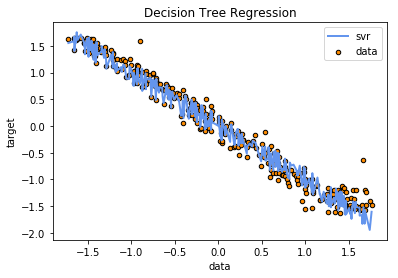

In [24]:
plt.figure()
plt.scatter(xx, Ytest, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(xx, y_1, color="cornflowerblue",label="svr", linewidth=2)
#plt.plot(xx, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()